In [1]:
#IMPORT DAS BIBLIOTECAS NECESSÁRIAS
import numpy as np #PARA DEFINIR OS PONTOS DE OBSERVAÇÕES 
from GeneticAlgorithm import GeneticAlgorithm as GA #IMPORTAR A CLASSE ALGORITMO GENETICO
import matplotlib.pyplot as plt #PARA VISUALIZAR O RESULTADO
from Models import rect #IMPORTANDO O MODELO
from Data.Functionals import phi #IMPORTANDO A FUNCAO DE AJUSTE
from Data.Population import Fontes #PRA CRIAR A POPULACAO USANDO O MELHOR DEPOIS DO GENETICO

In [28]:
#DEFINICAO DOS PARAMETROS PRO GENETICO
nobs = 100
xobs = np.linspace(-1000,1000,nobs) #SO PRA CALCULAR O GZ DO MELHOR INDIVIDUO DEPOIS DO GENETICO
zobs = np.zeros( nobs ) #SO PRA CALCULAR O GZ DO MELHOR INDIVIDUO DEPOIS DO GENETICO

# dimensoes do dique vertical:
xmin = -100.
xmax = +100.
zmin = 200.0
zmax = 800.0
rho = 2.95
model = rect( xmin, xmax, zmin, zmax, rho) #CRIANDO O MODELO
massa_verdadeira = rho * (xmax-xmin)*(zmax-zmin)*1200*1000 # calculo da massa verdadeira
print('massa verdadeira=',massa_verdadeira, 'kg')

model_gz = model.Gz( xobs, zobs ) #CALCULANDO O GZ DO MODELO
model_gz_noised = model.addnoise( ) #CALCULANDO O GZ DO MODELO + GAUSSIAN NOISE

nfontes = 20 #NUMERO DE BOLINHAS DE CADA INDIVIDUO
min_bounds = [ -900, 20, 1e6/nfontes ] #ONDE PROCURAR AS SOLUCOES
max_bounds = [ +900, 1000, 1e12/nfontes ] #ONDE PROCURAR AS SOLUCOES

nind = 100 #NUMERO DE INDIVIDUOS
pmut = 0.1 #PROBABILIDADE DE CADA INDIVIDUO MUTAR
mu = 1e-20 #FATOR DE REGULARIZACAO
ngera = 500 #NUMERO DE GERACOES

massa verdadeira= 424800000000.0 kg


In [29]:
#ALGORITMO GENETICO
ga = GA( phi, [ model_gz_noised, 'L2', mu ], min_bounds, max_bounds, pmut, nfontes, nind, nobs) #CRIANDO O AG USANDO OS PARAMETROS ESCOLHIDOS
ga.Initialize()
ga.FirstFit()
pop = Fontes( ) #CRIANDO UMA NOVA POPULACAO PRA GUARDAR O MELHOR DO GENETICO
melhor_primeira = pop.Gera_from_Existing( [ ga.winner ] ) #GUARDANDO O MELHOR DO GENETICO NESSA NOVA POPULACAO(QUE É UMA CLASSE) ( O MELHOR DO GENETICO TEM O NOME DE ga.winner)
gz_best_primeira = 0 #INICIALIZANDO O GZ DO MELHOR
for b in melhor_primeira: #O MELHOR É UM DICIONARIO, ONDE CADA CHAVE( OBJETO SPHERE ) GUARDA AS PROPIEDADES DESSA SPHERE( X, Y, M)
    for i in b: #AQUI PEGAMOS APENAS AS CHAVES( SPHERES )
        gz_best_primeira += i.Gz(xobs, zobs) #CALCULAMOS O GZ DE TODAS AS SPHERES

1e-20
1e-20


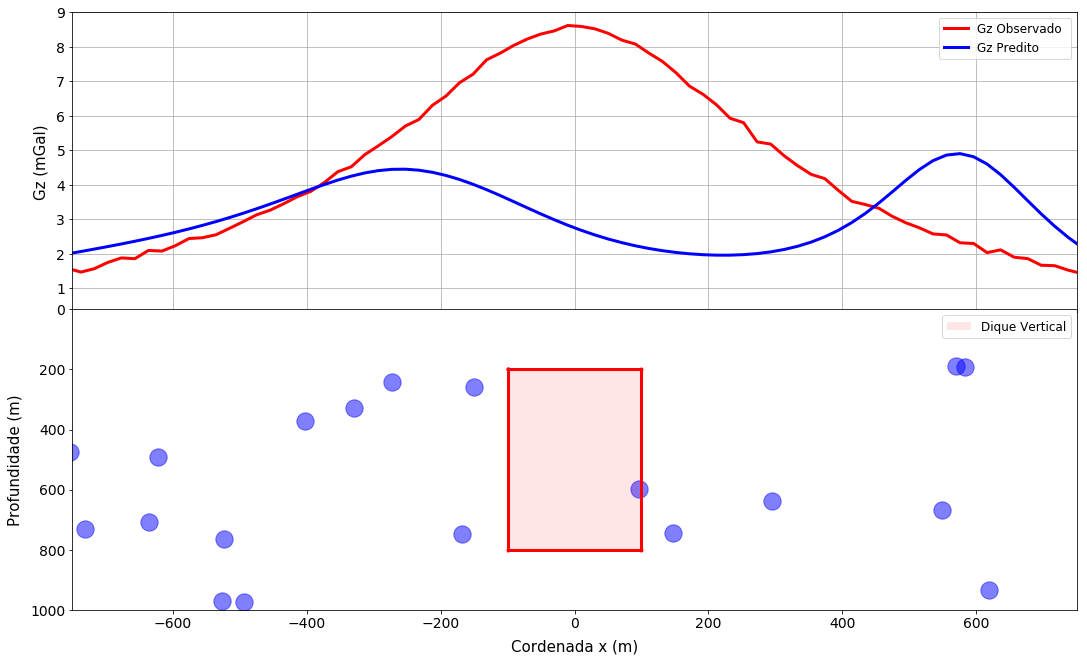

In [30]:
#PLOTANDO A O MODELO, AS BOLINHAS E AS CURVAS DA ETAPA 0
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18, 11), facecolor='w', sharex=True, gridspec_kw={'hspace': -0.01})

#error = (model_gz-gz_best_primeira)

ax1.plot(xobs, model_gz_noised, 'r-', label='Gz Observado ', linewidth=3)
ax1.plot(xobs, gz_best_primeira, 'b-', label='Gz Predito ', linewidth=3)
#ax1.plot(xobs, error, 'k-', label='Error')
ax1.legend(fontsize=12)
ax1.set_ylabel('Gz (mGal)', fontsize=15, labelpad=8)
ax1.set_xlim(-750, 750)
ax1.grid()
ax1.label_outer()
ax1.tick_params(axis='both',labelsize = 14)

# ---------------------------------------------------------------------------------------------

ax2.scatter(ga.winner[:, 0], ga.winner[:, 1], c='blue', s=300.0, alpha=0.5)
ax2.plot([model.params[0], model.params[0], model.params[1], model.params[1], model.params[0]], \
        [model.params[2], model.params[3], model.params[3], model.params[2], model.params[2]], ".-r", linewidth=3)

ax2.fill_between([model.params[0], model.params[0], model.params[1], model.params[1], model.params[0]], \
                 [model.params[2], model.params[3], model.params[3], model.params[2], model.params[2]],
                 facecolor='red', alpha=0.1, label='Dique Vertical')
ax2.legend(fontsize=12)

#ax2.scatter(xobs[0:-1:5], zobs[0:-1:5] + 10, s=20, c='green')
ax2.set_ylabel('Profundidade (m)', fontsize=15, labelpad=8)
ax2.set_ylim(0, 1000)
ax2.set_xlabel('Cordenada x (m)', fontsize=15, labelpad=8)
ax2.invert_yaxis()
ax2.label_outer()
ax2.tick_params(axis='both',labelsize = 14)
plt.savefig('sol_inicial_prisma.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)

plt.show( )

In [31]:
ga.start( ngera ) #COMECANDO AS ITERACOES (NESTE CASO, ngera)

pop = Fontes( ) #CRIANDO UMA NOVA POPULACAO PRA GUARDAR O MELHOR DO GENETICO
best = pop.Gera_from_Existing( [ ga.winner ] ) #GUARDANDO O MELHOR DO GENETICO NESSA NOVA POPULACAO(QUE É UMA CLASSE) ( O MELHOR DO GENETICO TEM O NOME DE ga.winner)
gz_best = 0 #INICIALIZANDO O GZ DO MELHOR
for b in best: #O MELHOR É UM DICIONARIO, ONDE CADA CHAVE( OBJETO SPHERE ) GUARDA AS PROPIEDADES DESSA SPHERE( X, Y, M)
    for i in b: #AQUI PEGAMOS APENAS AS CHAVES( SPHERES )
        gz_best += i.Gz(xobs, zobs) #CALCULAMOS O GZ DE TODAS AS SPHERES

thetas = ga.bests_theta #GUARDANDO A LISTA DOS THETAS (REGULARIZACAO = THETA)

1e-20
1e-20
Geração 0 1e-20
Geração 1 1e-20
17.233525546060218
Geração 2 1e-20
Geração 3 1e-20
Geração 4 1e-20
16.356152072423182
Geração 5 1e-20
Geração 6 1e-20
Geração 7 1e-20
14.971725187238773
Geração 8 1e-20
Geração 9 1e-20
10.304579201272562
Geração 10 1e-20
Geração 11 1e-20
5.460672041635407
Geração 12 1e-20
Geração 13 1e-20
3.482825695066878
Geração 14 1e-20
2.7701608982342063
Geração 15 1e-20
Geração 16 1e-20
Geração 17 1e-20
Geração 18 1e-20
Geração 19 1e-20
Geração 20 1e-20
Geração 21 1e-20
Geração 22 1e-20
Geração 23 1e-20
Geração 24 1e-20
Geração 25 1e-20
Geração 26 1e-20
Geração 27 1e-20
Geração 28 1e-20
Geração 29 1e-20
Geração 30 1e-20
Geração 31 1e-20
Geração 32 1e-20
Geração 33 1e-20
Geração 34 1e-20
Geração 35 1e-20
Geração 36 1e-20
Geração 37 1e-20
Geração 38 1e-20
Geração 39 1e-20
Geração 40 1e-20
Geração 41 1e-20
Geração 42 1e-20
Geração 43 1e-20
1.6263801160010998
Geração 44 1e-20
Geração 45 1e-20
Geração 46 1e-20
Geração 47 1e-20
Geração 48 1e-20
Geração 49 1e-2

Geração 452 1e-20
Geração 453 1e-20
Geração 454 1e-20
Geração 455 1e-20
Geração 456 1e-20
Geração 457 1e-20
Geração 458 1e-20
Geração 459 1e-20
Geração 460 1e-20
Geração 461 1e-20
Geração 462 1e-20
Geração 463 1e-20
Geração 464 1e-20
Geração 465 1e-20
Geração 466 1e-20
Geração 467 1e-20
Geração 468 1e-20
Geração 469 1e-20
Geração 470 1e-20
Geração 471 1e-20
Geração 472 1e-20
Geração 473 1e-20
Geração 474 1e-20
Geração 475 1e-20
Geração 476 1e-20
Geração 477 1e-20
Geração 478 1e-20
Geração 479 1e-20
Geração 480 1e-20
Geração 481 1e-20
Geração 482 1e-20
Geração 483 1e-20
Geração 484 1e-20
Geração 485 1e-20
Geração 486 1e-20
Geração 487 1e-20
Geração 488 1e-20
Geração 489 1e-20
Geração 490 1e-20
Geração 491 1e-20
Geração 492 1e-20
Geração 493 1e-20
Geração 494 1e-20
Geração 495 1e-20
Geração 496 1e-20
Geração 497 1e-20
Geração 498 1e-20
Geração 499 1e-20
Melhor: 1.4663415884849242


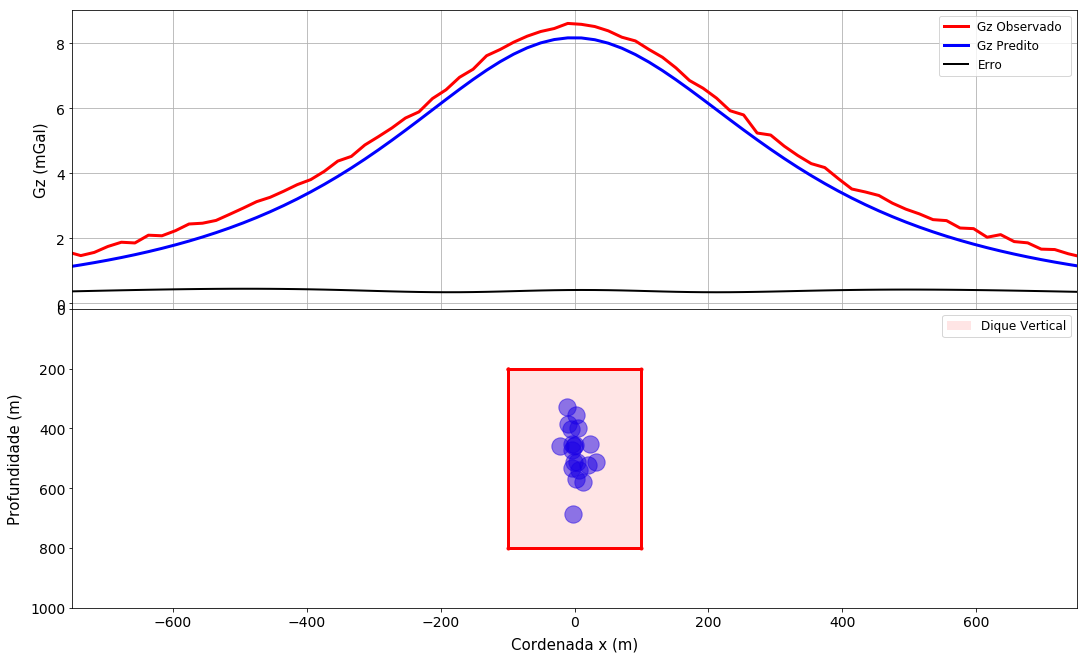

In [32]:
#PLOTANDO A O MODELO, AS BOLINHAS E AS CURVAS
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18, 11), facecolor='w', sharex=True, 
                                  gridspec_kw={'hspace': 0.0})

error = (model_gz-gz_best)

ax1.plot(xobs, model_gz_noised, 'r-', label='Gz Observado ', linewidth=3)
ax1.plot(xobs, gz_best, 'b-', label='Gz Predito ', linewidth=3)
ax1.plot(xobs, error, 'k-', label='Erro', linewidth=2)
ax1.legend(fontsize=12)
ax1.set_ylabel('Gz (mGal)', fontsize=15, labelpad=8)
ax1.set_xlim(-750, 750)
ax1.grid()
ax1.label_outer()
ax1.tick_params(axis='both',labelsize = 14)

#----------------------------------------------------------------------------------------------------------

ax2.scatter(ga.winner[:, 0], ga.winner[:, 1], c='blue', s=300.0, alpha=0.5)
ax2.plot([model.params[0], model.params[0], model.params[1], model.params[1], model.params[0]], \
        [model.params[2], model.params[3], model.params[3], model.params[2], model.params[2]], ".-r", linewidth=3)

ax2.fill_between([model.params[0], model.params[0], model.params[1], model.params[1], model.params[0]], \
                 [model.params[2], model.params[3], model.params[3], model.params[2], model.params[2]],
                 facecolor='red', alpha=0.1, label='Dique Vertical')
ax2.legend(fontsize=12)

#ax2.scatter(xobs[0:-1:5], zobs[0:-1:5] + 10, s=20, c='green')
ax2.set_ylabel('Profundidade (m)', fontsize=15, labelpad=8)
ax2.set_ylim(0, 1000)
ax2.set_xlabel('Cordenada x (m)', fontsize=15, labelpad=8)
ax2.invert_yaxis()
ax2.label_outer()
ax2.tick_params(axis='both',labelsize = 14)
plt.savefig('best_sol.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
plt.show( )

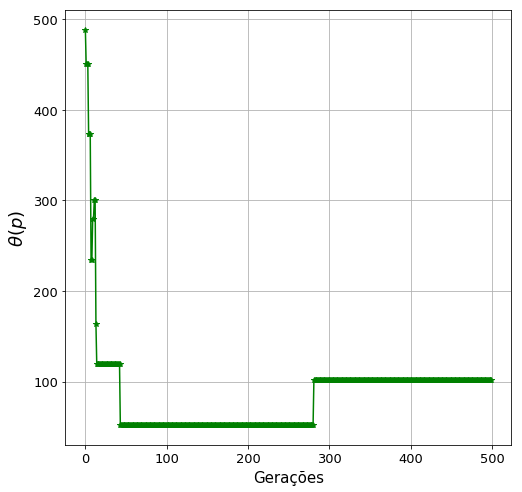

In [33]:
#PLOTANDO A FUNCAO THETA
plt.figure( figsize = ( 8,8 ) )
plt.plot( range( ngera ), thetas, '*-g')
plt.xlabel('Gerações', fontsize=15, labelpad=5)
plt.ylabel(r'$\theta(p)$ ', fontsize=18)
plt.tick_params(axis='both', labelsize=13)
plt.grid()
plt.savefig('Conv_prisma.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
plt.show()


In [34]:
ga.winner

array([[-3.16391334e+00,  4.72791211e+02,  1.28574723e+10],
       [ 2.03977561e+01,  5.22519994e+02,  1.28574723e+10],
       [-2.14288958e+01,  4.60215647e+02,  1.28574723e+10],
       [-1.74496248e+00,  6.87271136e+02,  1.28574723e+10],
       [ 4.85516361e+00,  3.98308204e+02,  1.28574723e+10],
       [ 1.30995432e+01,  5.78647523e+02,  1.28574723e+10],
       [ 2.87287373e+00,  5.70017503e+02,  1.28574723e+10],
       [-3.31003388e+00,  5.31968056e+02,  1.28574723e+10],
       [ 1.19565640e+00,  4.56629225e+02,  1.28574723e+10],
       [ 3.20099073e+01,  5.12171295e+02,  1.28574723e+10],
       [ 2.29069668e+01,  4.52753393e+02,  1.28574723e+10],
       [-9.37131729e-02,  5.11552889e+02,  1.28574723e+10],
       [-4.37903846e+00,  4.50990296e+02,  1.28574723e+10],
       [ 2.01904261e+00,  3.53733443e+02,  1.28574723e+10],
       [-1.47062754e+00,  4.57453501e+02,  1.28574723e+10],
       [ 7.40750751e+00,  5.40365835e+02,  1.28574723e+10],
       [ 2.95849020e+00,  5.12470070e+02

/home/rodbijani/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


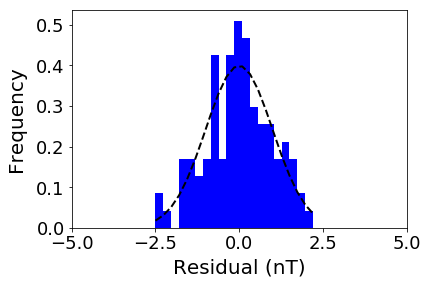

In [35]:
# Plotting the histogram of residual
from scipy.stats import norm
residuo = model_gz_noised - gz_best
res_mu = np.mean(residuo)
res_sigma = np.std(residuo)
s = (residuo - res_mu) / res_sigma

s = np.ravel(s)
nbins = int(np.max(s) - np.min(s))
n, bins, patches = plt.hist(s, 20, normed = True, facecolor = 'blue', alpha = 1.)
y_hist = norm.pdf(bins, np.mean(s), np.std(s))
plt.plot(bins, y_hist, 'k--', linewidth = 2)
#pyplot.text(3.5,0.25, '$\mu$=%0.5f' % (res_mu), horizontalalignment = 'center', fontsize = 12)
#pyplot.text(3.5,0.3, '$\sigma$=%0.5f' % (res_sigma), horizontalalignment = 'center', fontsize = 12)
plt.xlabel('Residual (nT)' , fontsize = 20, labelpad = 5)
plt.ylabel('Frequency', fontsize = 20, labelpad = 10)
plt.xlim(-5,5)
plt.xticks(np.arange(-5., 5 + 2.5, 2.5), fontsize = 18)
plt.yticks(fontsize = 18)
plt.savefig('hist.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
plt.show()

In [36]:
mmm = (massa_verdadeira - ga.winner[0,2]*nfontes)/ massa_verdadeira
mmm

0.3946576113721852